Note. This notebook will take 2 hours to run.

In [1]:
# Import the relevant packages
import time
start_time = time.time()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
from function_notebook_1 import *

In [3]:
df = pd.read_csv('data/regularseason19.csv').drop('Unnamed: 0', axis = 1)
df.head()

,w_loc,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,...,L_Opp_TSpct,L_Opp_FTr,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win
0,A,1107.0,64.500000,20.500000,58.500000,8.000000,22.000000,15.500000,19.000000,13.500000,...,0.584000,0.377358,0.416000,28.000000,0.933333,0.538462,0.049459,0.105263,0.193548,True
1,H,1135.0,74.333333,24.666667,57.333333,7.000000,21.000000,18.000000,28.333333,8.666667,...,0.579858,0.160584,0.393354,34.000000,1.869565,0.651515,0.071359,0.000000,0.134937,True
2,H,1140.0,78.000000,27.250000,64.750000,6.250000,24.750000,17.250000,23.750000,9.500000,...,0.689749,0.348101,0.412763,35.000000,1.102041,0.586957,0.106986,0.088235,0.210188,True
3,N,1157.0,71.333333,22.333333,51.000000,7.000000,20.333333,19.666667,31.333333,9.666667,...,0.568401,0.396947,0.282595,46.500000,1.535714,0.671875,0.158803,0.102041,0.152422,True
4,A,1165.0,66.333333,24.000000,58.000000,5.666667,24.666667,12.666667,19.666667,7.000000,...,0.489335,0.421687,0.296110,36.666667,0.837838,0.484375,0.051869,0.084337,0.156614,False


In [4]:
df = pd.get_dummies(df, columns=['w_loc'], drop_first=True)
df

,W_TeamID,W_Score,W_FGM,W_FGA,W_FGM3,W_FGA3,W_FTM,W_FTA,W_OR,W_DR,...,L_Opp_3Pr,L_Opp_TR,L_Opp_ATOr,L_Opp_Ast_%,L_Opp_Stl_%,L_Opp_Blk_%,L_Opp_TO_r,fav_win,w_loc_H,w_loc_N
0,1107.0,64.500000,20.500000,58.500000,8.000000,22.000000,15.500000,19.000000,13.500000,22.500000,...,0.416000,28.000000,0.933333,0.538462,0.049459,0.105263,0.193548,True,0,0
1,1135.0,74.333333,24.666667,57.333333,7.000000,21.000000,18.000000,28.333333,8.666667,27.666667,...,0.393354,34.000000,1.869565,0.651515,0.071359,0.000000,0.134937,True,1,0
2,1140.0,78.000000,27.250000,64.750000,6.250000,24.750000,17.250000,23.750000,9.500000,36.750000,...,0.412763,35.000000,1.102041,0.586957,0.106986,0.088235,0.210188,True,1,0
3,1157.0,71.333333,22.333333,51.000000,7.000000,20.333333,19.666667,31.333333,9.666667,25.666667,...,0.282595,46.500000,1.535714,0.671875,0.158803,0.102041,0.152422,True,0,1
4,1165.0,66.333333,24.000000,58.000000,5.666667,24.666667,12.666667,19.666667,7.000000,26.666667,...,0.296110,36.666667,0.837838,0.484375,0.051869,0.084337,0.156614,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,1153.0,71.787879,24.909091,57.666667,6.666667,19.060606,15.303030,21.787879,12.848485,23.303030,...,0.350519,33.424242,0.835381,0.508982,0.067655,0.038110,0.158925,False,0,1
4977,1209.0,75.903226,26.580645,57.612903,9.677419,25.161290,13.064516,20.032258,8.129032,24.387097,...,0.320903,35.161290,0.994924,0.519894,0.079023,0.067682,0.158553,True,0,1
4978,1277.0,79.242424,27.939394,57.242424,8.272727,21.575758,15.090909,20.121212,10.818182,30.181818,...,0.257074,34.545455,0.829146,0.447154,0.050984,0.057022,0.161555,True,0,1
4979,1387.0,67.411765,23.941176,57.088235,5.794118,18.529412,13.735294,22.882353,13.794118,25.970588,...,0.375596,33.848485,0.847727,0.512363,0.075419,0.047901,0.174832,True,0,1


In [5]:
#train_test_split
X = df.drop('fav_win',axis=1)
y = df['fav_win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3984, 108), (997, 108))

In [6]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Logistic Regression

In [8]:
log_feat=feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)
X_train_best_log = X_train_scaled[log_feat]
X_test_best_log = X_test_scaled[log_feat]

Penalty: l2
Solver: saga
Mean Cross-Val Score: 0.8569327188010316
Train Mean Accuracy: 0.865210843373494
Test Mean Accuracy: 0.8405215646940822
Recall Score: 0.9247606019151847
Precision Score: 0.8666666666666667
F1 Score: 0.8947716743878226


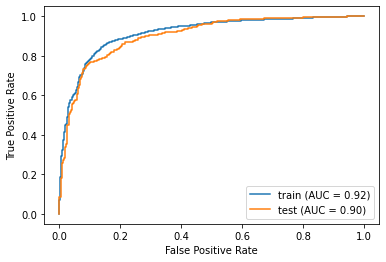

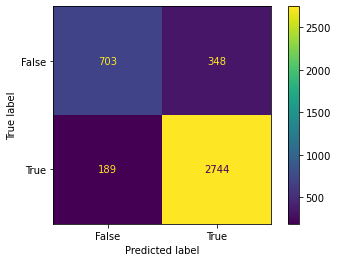

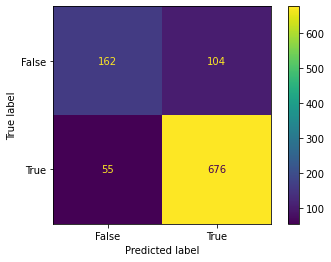

In [9]:
logreg(X_train_best_log, X_test_best_log, y_train, y_test)

### KNN

Number of Neighbors: 11
Metric: minkowski
Weights: distance
Mean Cross-Val Score: 0.8285669249635884
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8375125376128385
Recall Score: 0.9699042407660738
Precision Score: 0.8351001177856302
F1 score: 0.8974683544303798


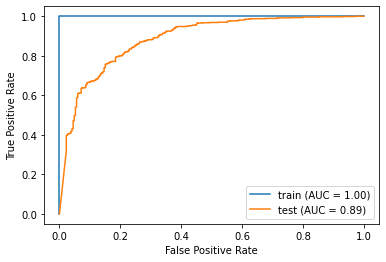

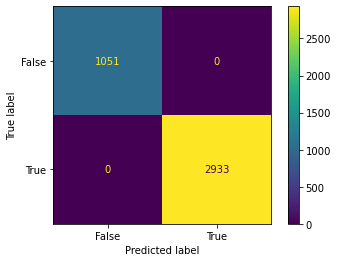

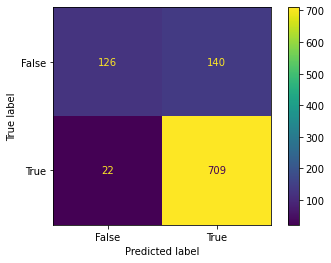

In [10]:
knn(X_train_scaled, X_test_scaled, y_train, y_test)

### Decision Tree

In [11]:
dtree_feats=feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)

In [12]:
X_train_best_dtree=X_train[dtree_feats]
X_test_best_dtree=X_test[dtree_feats]

Max Depth: 10
Min Sample Split: 8
criterion: entropy
Mean Cross-Val Score: 0.7740969590739141
Train Mean Accuracy: 0.927710843373494
Test Mean Accuracy: 0.7733199598796389
Recall Score: 0.86593707250342
Precision Score: 0.8318002628120894
F1 score: 0.8485254691689009


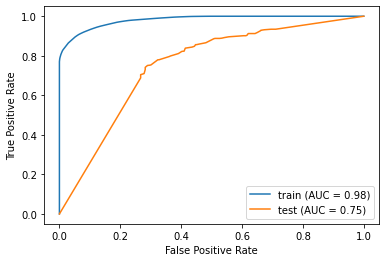

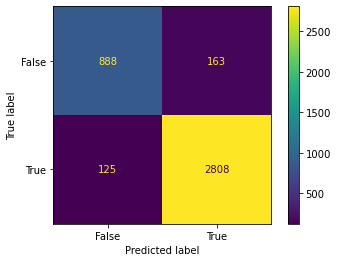

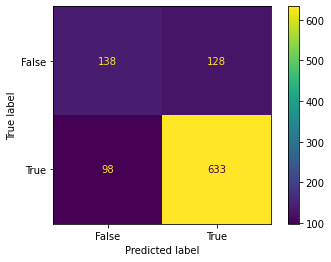

In [13]:
dtree(X_train_best_dtree, X_test_best_dtree, y_train, y_test)

### Random Forest

In [14]:
random_forest_feat=feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_rforest=X_train_scaled[random_forest_feat]
X_test_best_rforest=X_test_scaled[random_forest_feat]

Number of Trees: 150
Criterion: gini
Mean Cross-Val Score: 0.8491513401385851
Train Mean Accuracy: 1.0
Test Mean Accuracy: 0.8555667001003009
Recall Score: 0.9767441860465116
Precision Score: 0.8489892984542212
F1 score: 0.9083969465648855


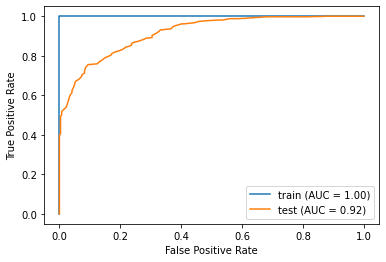

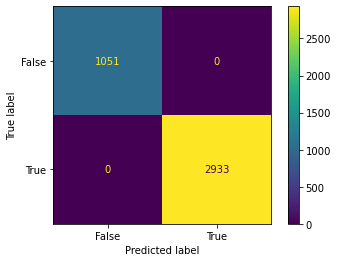

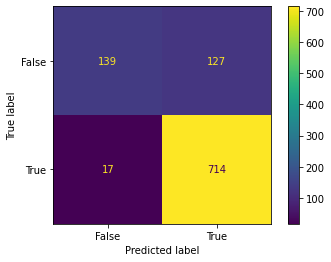

In [15]:
random_forest(X_train, X_test, y_train, y_test, cv=5)

### Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 1
Bag Max Features: 1
# of Base Estimators: 10
Mean Cross-Val Score: 0.7361947756347611
Train Mean Accuracy Score: 0.7361947791164659
Test Mean Accuracy Score: 0.7331995987963892
Recall Score: 1.0
Precision Score: 0.7331995987963892
F1 score: 0.8460648148148148


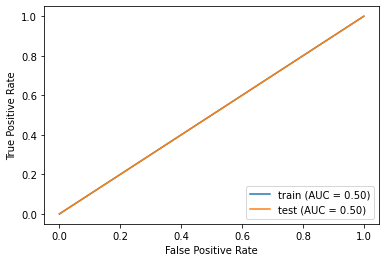

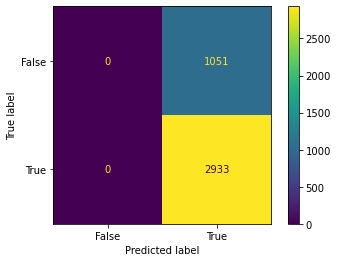

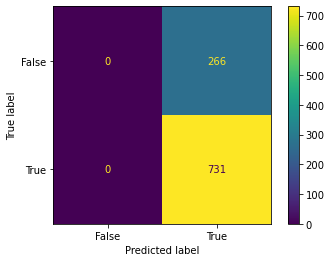

In [16]:
bagged(X_train, X_test, y_train, y_test, cv=5)

### XGboost

XGBoost Learning Rate: 0.5
XGBoost Max Depth: 4
XGBoost Min Child Weight: 3
XGBoost Subsample: 1
XGBoost Estimators: 100
Mean Cross-Val Score: 0.8644641021922663
Train Mean Accuracy Score: 1.0
Test Mean Accuracy Score: 0.8505516549648947
Recall Score: 0.9425444596443229
Precision Score: 0.8655778894472361
F1 score: 0.9024230517354289


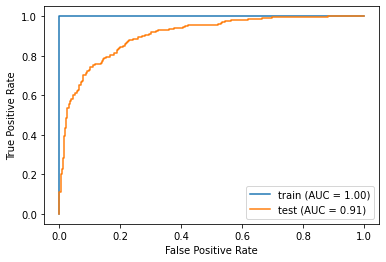

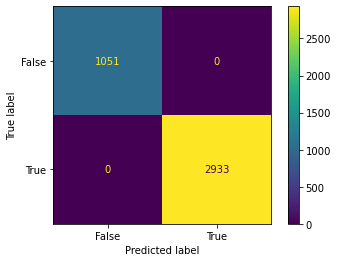

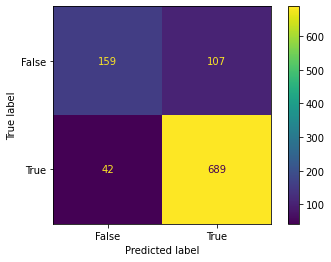

In [17]:
xgboost(X_train, X_test, y_train, y_test, cv=5)

In [18]:
end_time = time.time()
print('Notebook execution time is =%.6f seconds' % (end_time-start_time))

Notebook execution time is =7754.046396 seconds
